In [49]:
import pandas as pd
from opytex import texenv
%matplotlib inline

# Informations sur le devoir

In [50]:
ds_name = "DM_15_09_18"
classe = "309"

latex_info = {}
latex_info['titre'] = "DM 1"  
latex_info['classe'] = classe
latex_info['date'] = "18 septembre 2015"
latex_info

{'classe': '309', 'date': '18 septembre 2015', 'titre': 'DM 1'}

# Import et premiers traitements

In [51]:
notes = pd.ExcelFile("./../../../309.xlsx")
notes.sheet_names
notes = notes.parse(ds_name)

In [52]:
notes.index

Index([  'DM_15_09_18',  'numero sujet',    'Exercice 1',      '1 (PGCD)',
       '2 (Quantités)',    'Exercice 2',               1,               2,
                     3,               4,               5,               6],
      dtype='object')

In [53]:
notes = notes.T

In [54]:
#notes = notes.drop('av_arrondi', axis=1)
notes = notes.drop('numero sujet', axis=1)

In [55]:
barem = notes[:1]
notes = notes[1:]
notes
barem

DM_15_09_18  Exercice 1  1 (PGCD)  2 (Quantités)  Exercice 2  1  2  3  \
BAREME           10           4         2              2           6  1  1  1   

        4  5  6  
BAREME  1  1  1

## Supression des notes inutiles 

In [56]:
notes = notes[notes[ds_name].notnull()]
#notes = notes[notes[ds_name] != 'abs']

In [57]:
notes = notes.astype(float)

## Traitement des notes

In [58]:
notes.T.index

Index([  'DM_15_09_18',    'Exercice 1',      '1 (PGCD)', '2 (Quantités)',
          'Exercice 2',               1,               2,               3,
                     4,               5,               6],
      dtype='object')

In [59]:
list_exo = ["Exercice 1", "Exercice 2"]

In [60]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
notes[list_exo]

Exercice 1  Exercice 2
ABDOU Farida                  4.00        0.33
ABOU BACAR Djaha              4.00        6.00
AHAMADA Nabaouya              4.00        6.00
AHAMADI Faina                 1.33        2.67
ALI Mardhuia                  2.67        6.00
ALI SOULAIMANA Chamsia        2.00        6.00
ALSENE ALI MADI Stela         0.67        3.33
ANDRIATAHIANA Hoby            4.00        3.00
ANLI Emeline                  2.00        4.33
ATHOUMANE Naouidat            3.33        5.33
BOUDRA Nassifanya             4.00        6.00
CHANFI Nadhrati               3.33        2.00
COMBO Moinécha                4.00        6.00
HALIDI Nisma                  4.00        5.33
HAMZA Samianti                3.33        1.67
HOUMADI Mouslimati            2.67        5.00
HOUMADI Chaharazadi           2.00        4.67
HOUMADI Nasmi                 4.00        6.00
HOUMADI Dhoirfia              2.00        3.67
LOUTOUFI Nachima              1.33        2.33
MALIDE El-Anzize              2.00        2.67
MONNE Kevin                   4.00        4.33
MOUSSA Roibouanti             4.00        6.00
OUSSENI Hilma                 2.00        3.33
SAANLI Natali                 4.00        1.67
SAID AHAMADA Roukaya          4.00        5.00
SANDA Issoufi                 2.00        4.67
SOILIHI Soifia                2.00        4.00
SOUFIANI Laila                2.00        2.67
YOUSSOUF Sitirati             2.00        5.00

In [61]:
item_avec_note = list_exo + [ds_name]
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['1 (PGCD)', '2 (Quantités)', 1, 2, 3, 4, 5, 6]

In [62]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [63]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [64]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [65]:
len(notes.T.index)

11

# Preparation du fichier .tex

In [66]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan309.tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [43]:
notes[ds_name].describe()

count    29.000000
mean      7.120690
std       2.149149
min       3.500000
25%       5.500000
50%       7.000000
75%       9.000000
max      10.000000
Name: DM_15_09_18, dtype: float64

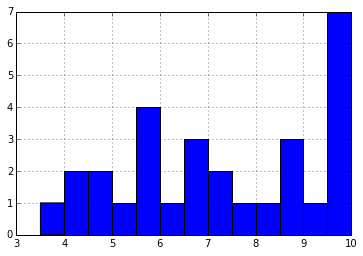

In [44]:
notes_seules = notes[ds_name]
notes_seules.hist(bins = (notes_seules.max() - notes_seules.min())*2)

In [45]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()

In [46]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1][notes_analysis[:1] == 25]

1 (PGCD)  2 (Quantités)   1   2   3   4   5   6
count       NaN            NaN NaN NaN NaN NaN NaN NaN